<a href="https://colab.research.google.com/github/wilaipa/data_viz/blob/main/Visualize_Data_Distribution_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เมื่อเรามีตัวแปรมากกว่า 2 ตัว เราสามารถใช้ PCA (Principle Component Analysis) ในการลดจำนวนตัวแปรลงได้

Projection

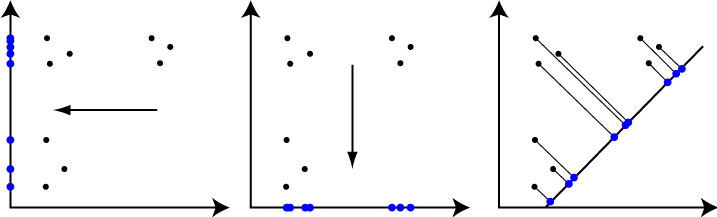

#Load data

In [49]:
import pandas as pd

In [50]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


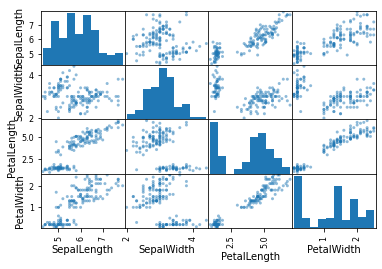

In [51]:
pd.plotting.scatter_matrix(example_df);

#PCA

sklearn -> scikit-learn เป็น package ที่รวบรวม function การทำ Data Science - Machine Learning - Data Mining เอาไว้ให้เราใช้แบบไม่ต้องเขียนเอง

Import

In [52]:
from sklearn.decomposition import PCA

Define

In [53]:
pca = PCA()

#### Fit - Transform

In [54]:
example_df.iloc[:,:-1].shape

(150, 4)

In [55]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])  ## record - แถว  , dimension - หลัก

In [56]:
new_pca.shape

(150, 4)

In [57]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [58]:
from matplotlib import pyplot as plt

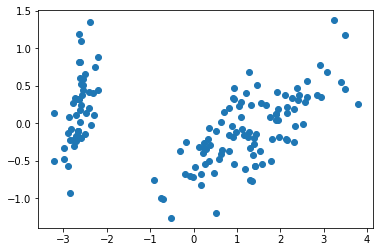

In [59]:
plt.scatter(new_pca[:,0],new_pca[:,1])

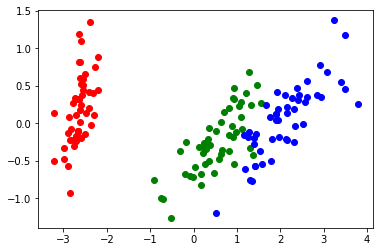

In [60]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'ro')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'go')
plt.plot(new_pca[100:,0],new_pca[100:,1],'bo')

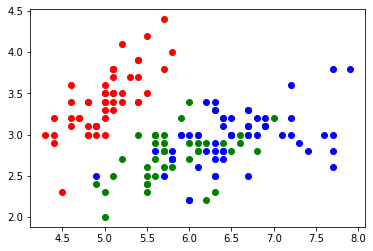

In [61]:
plt.plot(example_df.iloc[:50,0],example_df.iloc[:50,1],'ro')
plt.plot(example_df.iloc[50:100,0],example_df.iloc[50:100,1],'go')
plt.plot(example_df.iloc[100:,0],example_df.iloc[100:,1],'bo')

## Scree plot

In [62]:
pca.explained_variance_

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

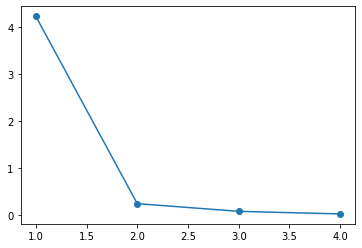

In [63]:
plt.plot([1,2,3,4],pca.explained_variance_,'o-')

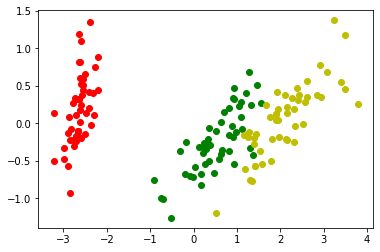

In [64]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

# Example

In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,01001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,01002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,01003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,01004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,01005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,01006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,01007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,01008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,01009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,01010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [67]:
data.shape

(12674, 45)

## ลอง  plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7fb514cd0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

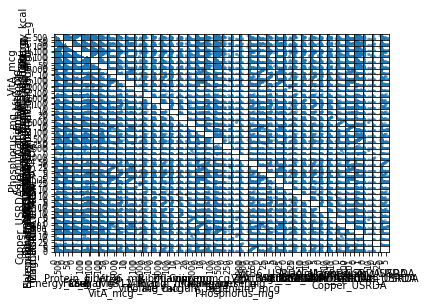

In [68]:
pd.plotting.scatter_matrix(data)

## เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

### เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [69]:
newdata = data.iloc[:,7:]
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [70]:
import numpy as np

In [71]:
corr = np.corrcoef(newdata.to_numpy().T)

In [72]:
corr.shape

(38, 38)

In [73]:
corr

array([[1.        , 0.04703203, 0.78667049, ..., 0.14257583, 0.01714058,
        0.04738072],
       [0.04703203, 1.        , 0.03786046, ..., 0.38788449, 0.38134291,
        0.41780153],
       [0.78667049, 0.03786046, 1.        , ..., 0.04109851, 0.01162917,
        0.01724928],
       ...,
       [0.14257583, 0.38788449, 0.04109851, ..., 1.        , 0.20321876,
        0.21724942],
       [0.01714058, 0.38134291, 0.01162917, ..., 0.20321876, 1.        ,
        0.22479907],
       [0.04738072, 0.41780153, 0.01724928, ..., 0.21724942, 0.22479907,
        1.        ]])

In [74]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

column = 8 <=> column = 25 corrcoef = 1.0
column = 10 <=> column = 27 corrcoef = 1.0
column = 11 <=> column = 28 corrcoef = 1.0
column = 12 <=> column = 29 corrcoef = 1.0
column = 16 <=> column = 33 corrcoef = 1.0
column = 18 <=> column = 34 corrcoef = 1.0
column = 21 <=> column = 36 corrcoef = 1.0
column = 22 <=> column = 37 corrcoef = 1.0
column = 25 <=> column = 8 corrcoef = 1.0
column = 27 <=> column = 10 corrcoef = 1.0
column = 28 <=> column = 11 corrcoef = 1.0
column = 29 <=> column = 12 corrcoef = 1.0
column = 33 <=> column = 16 corrcoef = 1.0
column = 34 <=> column = 18 corrcoef = 1.0
column = 36 <=> column = 21 corrcoef = 1.0
column = 37 <=> column = 22 corrcoef = 1.0


In [75]:
newdata.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [76]:
from matplotlib import pyplot as plt

### data ที่มี  correlation เป็น 1

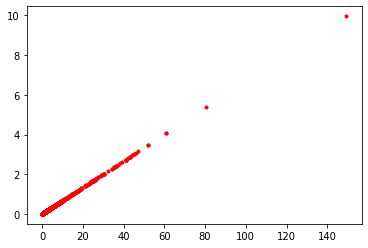

In [77]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

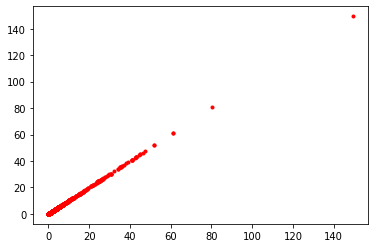

In [78]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

### data ที่มี  correlation เป็นค่าอื่นๆ

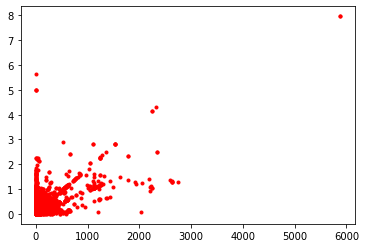

In [79]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

 ### ลบ column ซ้ำ

In [80]:
newdata.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [81]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [82]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
12670,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
12671,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
12672,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


# Quiz1 ลบ columns  ที่มีค่า  correlation เป็น 1 เมื่อเทียบกับ  column  อื่น

In [83]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
12670,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
12671,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
12672,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [84]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
12670,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
12671,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
12672,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### ทดลอง plot กราฟ parallel coordinate

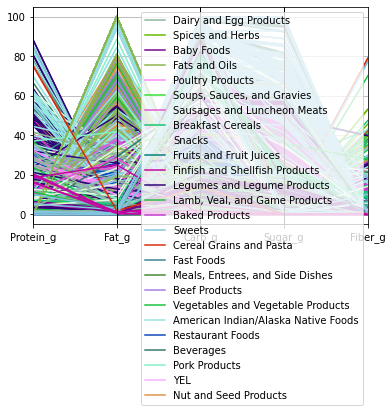

In [85]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

### ทำ PCA เพื่อลดจำนวน  Dimension  ของข้อมูล

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)

In [88]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [89]:
new_pca.shape

(12674, 2)

In [90]:
new_pca

array([[ 597.02223434,   46.03628923],
       [ 597.0221792 ,   46.03768643],
       [ 753.15743331,   63.06171268],
       ...,
       [ -88.01466978,  -59.52131807],
       [ -58.27754585, -107.341622  ],
       [ -57.37329457,   -7.13208901]])

### ดูว่ามี food group อะไรบ้าง

In [91]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products',
 'YEL'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

#### สร้าง ​color list แบบง่าย (เมื่อรันใหม่เลขลำดับอาจจะเปลี่ยนแปลง)

In [92]:
# color_list = {}
# num = 0
# for each_fg in FG:
#     if each_fg not in color_list:
#         color_list[each_fg] = num
#         num += 1

In [93]:
# color_list

#### สร้าง color list แบบข้างล่างนี้ ​ลำดับจะไม่มีการเปลี่ยนแปลง

In [94]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [95]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24,
 'YEL': 25}

### แทนค่า text ใน  Dictionary ด้วยตัวเลขที่เรากำหนด

In [96]:
data_dropped2 = data_dropped.replace(color_list2)

In [97]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
12670,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
12671,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
12672,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot กราฟ  Scatter

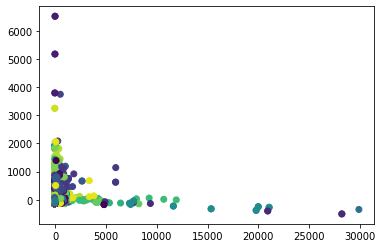

In [98]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

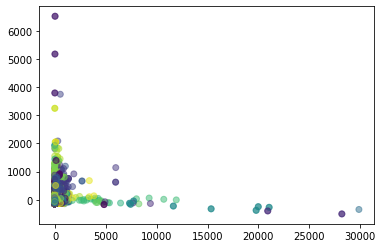

In [99]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ sweet

In [100]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
295,1,347.0,0.00,0.02,86.68,57.40,0.0,0.0,0.014,0.00,8.0,1.0,12.0,0.037,0.24,0.062,1.9,0.000000,0.008235,0.0000,0.088889,0.000667,0.0025,0.003563,0.007692,0.012500,0.010000,0.000041,0.016667,0.012857,0.034545,0.002727
296,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
297,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
298,1,81.0,13.12,2.45,1.51,0.00,0.0,0.0,0.049,1.65,0.0,5.0,6.0,0.148,0.76,0.037,3.5,0.000000,0.028824,0.6875,0.000000,0.018667,0.0125,0.178125,0.089231,0.019167,0.005000,0.000164,0.026190,0.140000,0.063636,0.227273
299,1,124.0,14.00,7.10,0.00,0.00,0.0,11.0,0.205,0.99,1.8,2.0,5.0,0.072,1.00,0.000,12.9,0.012222,0.120588,0.4125,0.020000,0.026667,0.0050,0.141813,0.156154,0.121667,0.004167,0.000080,0.023810,0.134286,0.234545,0.206364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,1,389.0,6.60,0.90,88.60,1.35,2.6,0.0,0.090,0.00,250.0,5.0,38.0,0.377,9.00,1.298,16.3,0.000000,0.052941,0.0000,2.777778,0.008667,0.0125,1.577500,1.446154,1.333333,0.031667,0.000419,0.088095,0.361429,0.296364,0.300000
12645,1,91.0,1.00,0.20,21.34,11.36,1.6,0.0,0.260,0.00,21.9,17.0,4.0,0.040,0.30,0.000,1.1,0.000000,0.152941,0.0000,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
12646,1,68.0,0.30,0.20,16.30,14.66,1.0,2.0,0.060,0.00,12.3,4.0,3.0,0.030,0.10,0.000,0.6,0.002222,0.035294,0.0000,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
12650,1,73.0,0.50,0.20,17.18,14.87,2.0,3.0,0.070,0.00,12.7,6.0,6.0,0.035,0.17,0.000,0.4,0.003333,0.041176,0.0000,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [101]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

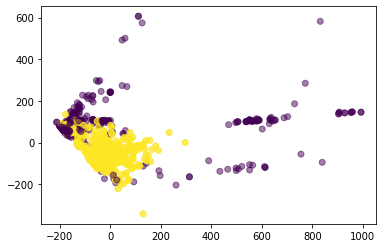

In [102]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [103]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca = pca.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

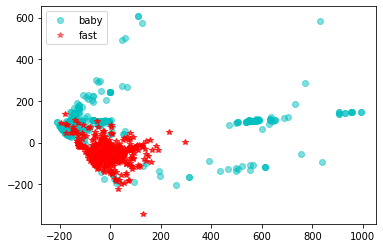

In [104]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()

### 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [105]:
pca.explained_variance_ratio_

array([0.66516931, 0.17583459])

### การใส่ชื่อกราฟ และ แกน

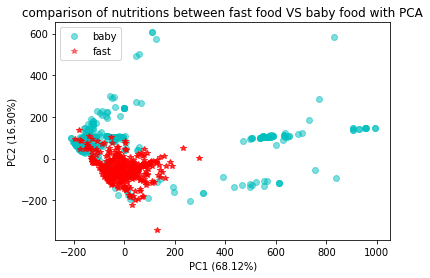

In [106]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()
plt.title('comparison of nutritions between fast food VS baby food with PCA')
plt.xlabel('PC1 (68.12%)')
plt.ylabel('PC2 (16.90%)');

### ลองทำ PCA ใหม่ เพราะ PC1 + PC2 ยังอธิบายข้อมูลได้ไม่ถึง 90% 

In [107]:
pca = PCA()
new_pca3 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [108]:
sum(pca.explained_variance_ratio_[:3])

0.9660021058423713

In [109]:
pca2 = PCA(n_components=3)
new_pca3 = pca2.fit_transform(bb.iloc[:,1:].to_numpy())

In [110]:
new_pca3

array([[ -35.05571646, -139.22070119,  -98.78357434],
       [-178.76327249,   47.51893346,   29.02734156],
       [-178.76327249,   47.51893346,   29.02734156],
       ...,
       [-184.82140278,   58.68806645,   32.96411232],
       [-179.34716351,   56.12206665,   31.70221875],
       [-182.41222133,   62.79989016,   43.24211686]])

In [111]:
baby_pca3 = pca2.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca3 = pca2.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

In [112]:
baby_pca3

array([[ -35.05571646, -139.22070119,  -98.78357434],
       [-178.76327249,   47.51893346,   29.02734156],
       [-178.76327249,   47.51893346,   29.02734156],
       ...,
       [-184.82140278,   58.68806645,   32.96411232],
       [-179.34716351,   56.12206665,   31.70221875],
       [-182.41222133,   62.79989016,   43.24211686]])

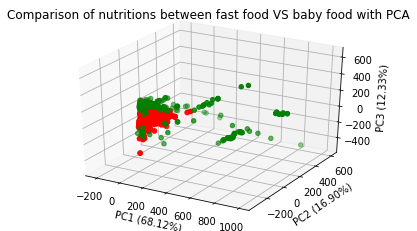

In [113]:
ax = plt.axes(projection ="3d")
ax.scatter3D(baby_pca3[:,0],baby_pca3[:,1],baby_pca3[:,2],c='g')
ax.scatter3D(fast_pca3[:,0],fast_pca3[:,1],fast_pca3[:,2],c='r')
ax.set_title('Comparison of nutritions between fast food VS baby food with PCA')
ax.set_xlabel('PC1 (68.12%)')
ax.set_ylabel('PC2 (16.90%)')
ax.set_zlabel('PC3 (12.33%)');

### Eigen Vectors

3.11513052e-04 = $3.11 x 10^{-4}$

In [114]:
pca2.components_

array([[ 4.96399618e-01,  1.04631703e-02,  2.45837310e-02,
         5.79795698e-02,  4.38619955e-02,  4.59969051e-04,
         4.17995947e-01,  2.96989151e-04,  1.45494208e-03,
         3.61878563e-02,  1.34039215e-01,  7.43661057e-01,
         4.06522056e-04,  1.62700244e-02,  4.81776269e-03,
         1.62953436e-02,  4.64439941e-04,  1.74699501e-04,
         6.06225865e-04,  4.02087292e-04,  4.00323982e-04,
         3.35098038e-04,  5.37163332e-04,  7.95568054e-04,
         7.33544552e-04,  6.19717547e-04,  4.51691174e-07,
         1.26196381e-04,  6.46284666e-04,  2.96278974e-04,
         4.09675688e-04],
       [-6.96865222e-01, -3.20089027e-02, -3.89111678e-02,
        -5.51030237e-02,  3.53198107e-02, -3.67752213e-03,
         7.05419351e-01, -2.92207187e-04, -1.86606094e-04,
         5.60131953e-02,  1.41601347e-02,  6.84182885e-02,
        -2.16348512e-05, -7.24809724e-03,  2.92956170e-03,
        -4.29282207e-02,  7.83799279e-04, -1.71886581e-04,
        -7.77525390e-05,  6.22

In [115]:
import numpy as np

In [116]:
np.argmax(pca2.components_[0,:])

11